# WEEK - 5

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('cleaned_dataset.csv')

In [0]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Day,Month,Year,Route
0,4,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,01:30,01:17,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,3,1,2019,IND-BWI
1,4,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,04:10,03:50,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,3,1,2019,IND-LAS
2,4,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,02:15,01:47,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,3,1,2019,IND-MCO
3,4,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,04:00,03:33,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,3,1,2019,IND-PHX
4,4,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,02:15,01:50,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,3,1,2019,IND-TPA


In [0]:
df['CancellationCode'].value_counts()

CancellationCode
N    484549
Name: count, dtype: int64

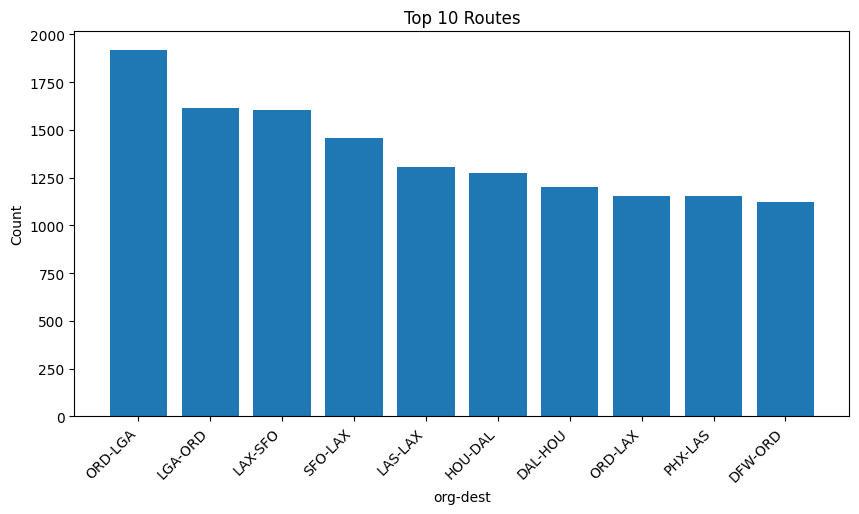

In [0]:
# top 10 org-dest pairs based on number of flights
df['pairs']=df['Origin']+'-'+df['Dest']
top=df['pairs'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.bar(top.index,top.values)
plt.title('Top 10 Routes')
plt.xlabel('org-dest')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

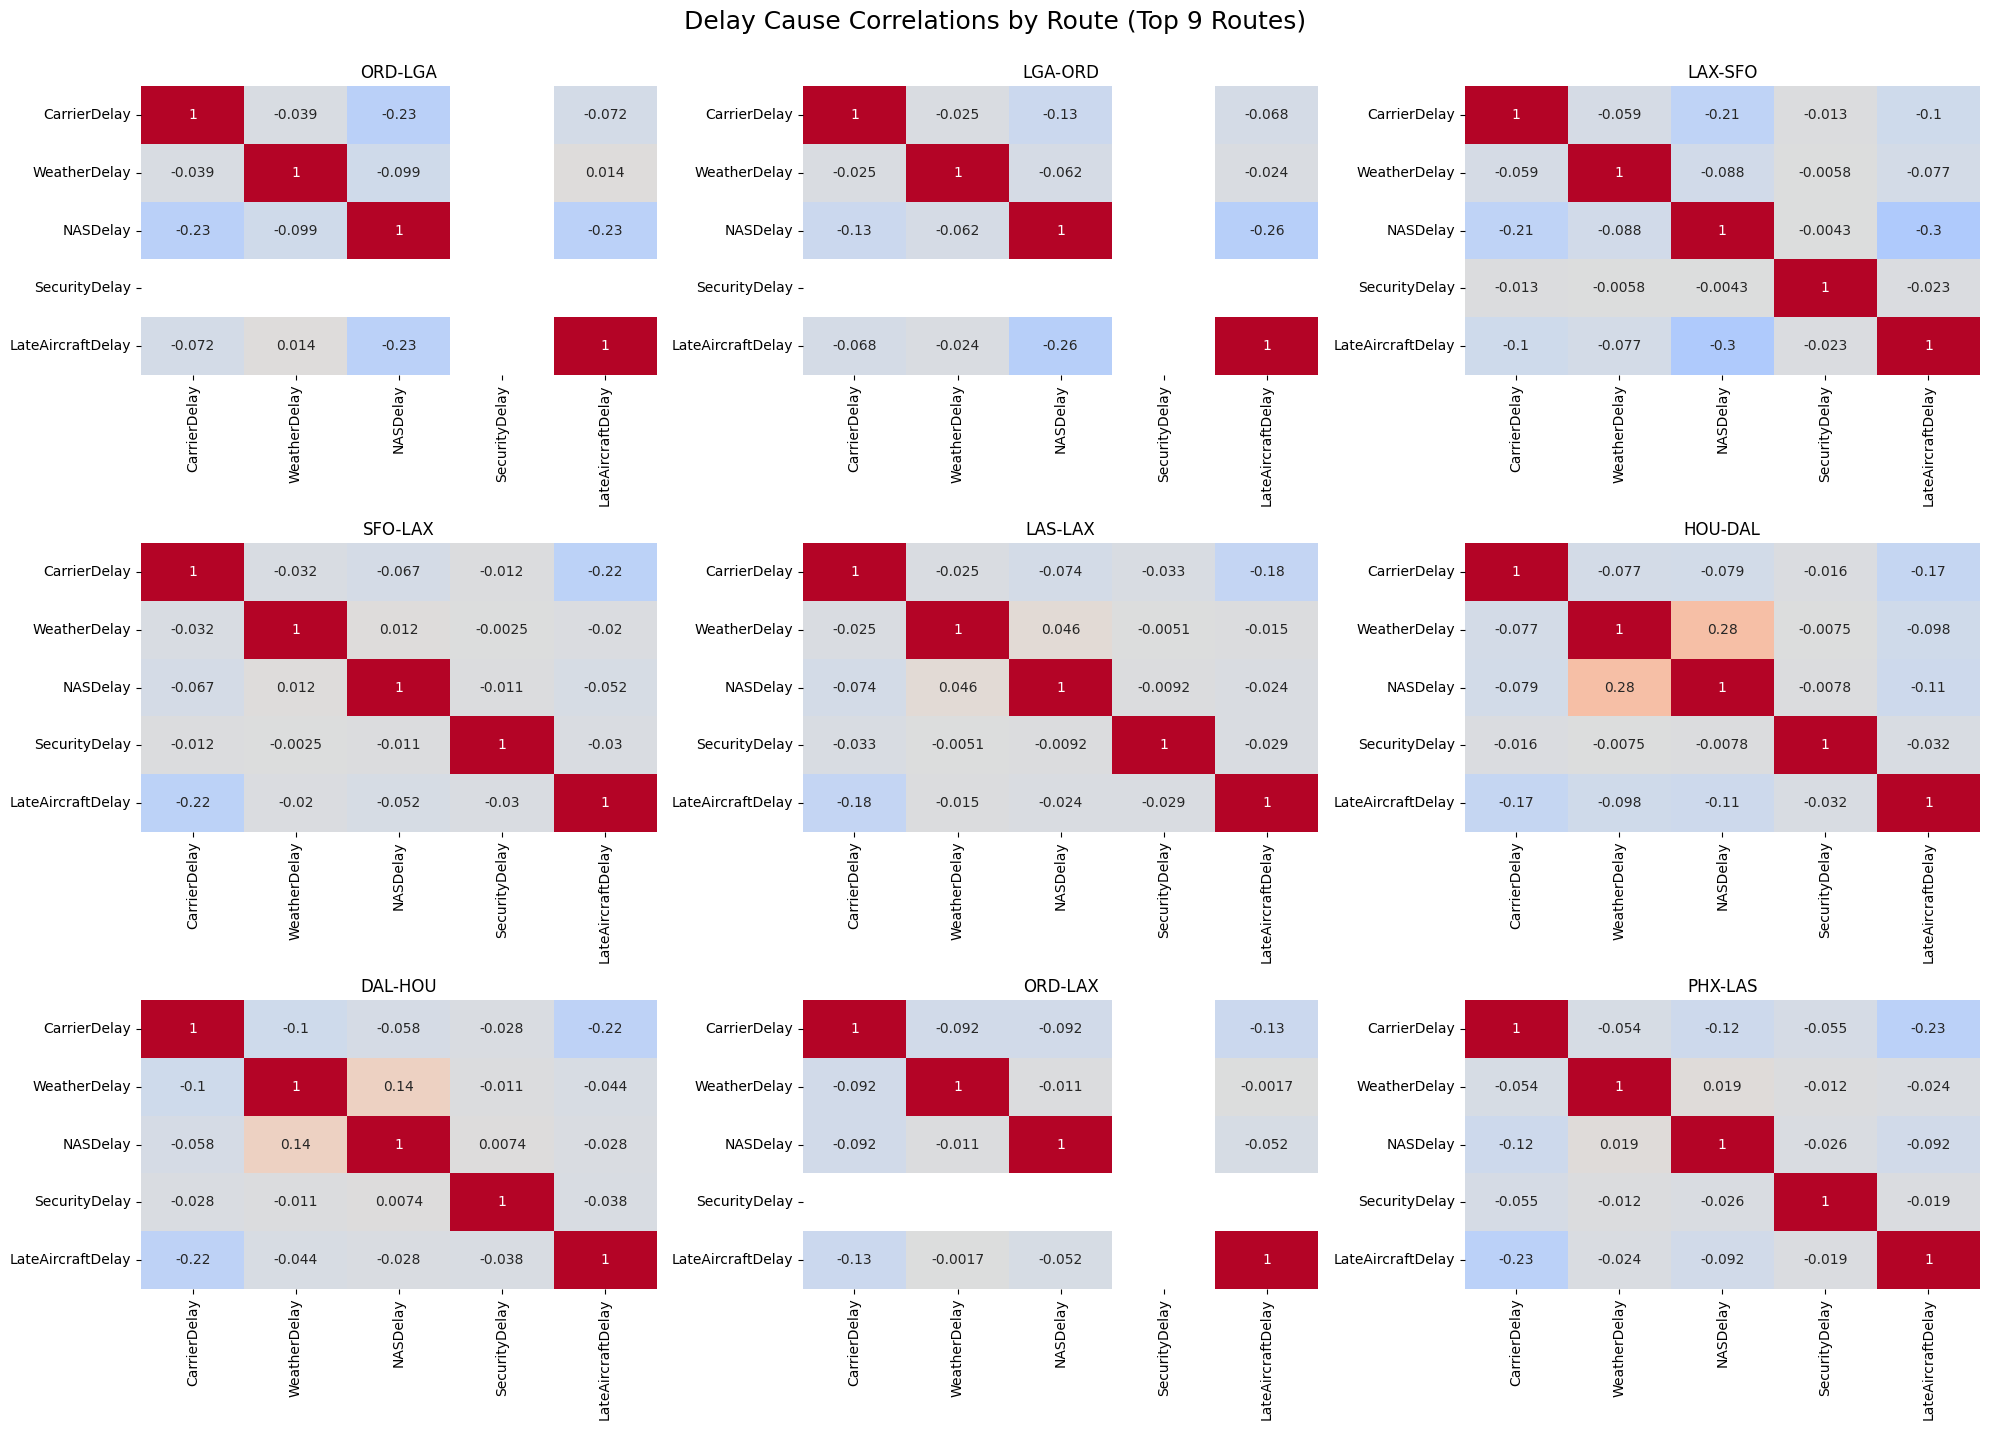

In [0]:
# Delay co-relations in top 9 routes
delay_causes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
routes = df['Route'].value_counts()[:9] 
routes=routes.index
num_routes = len(routes)
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15)) 
axes = axes.flatten() 

for ax, r in zip(axes, routes):
    data = df[df['Route'] == r][delay_causes]
    sns.heatmap(data.corr(), annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    ax.set_title(f'{r}', fontsize=12)
for i in range(len(routes), len(axes)):
    fig.delaxes(axes[i])
plt.suptitle('Delay Cause Correlations by Route (Top 9 Routes)', fontsize=18, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


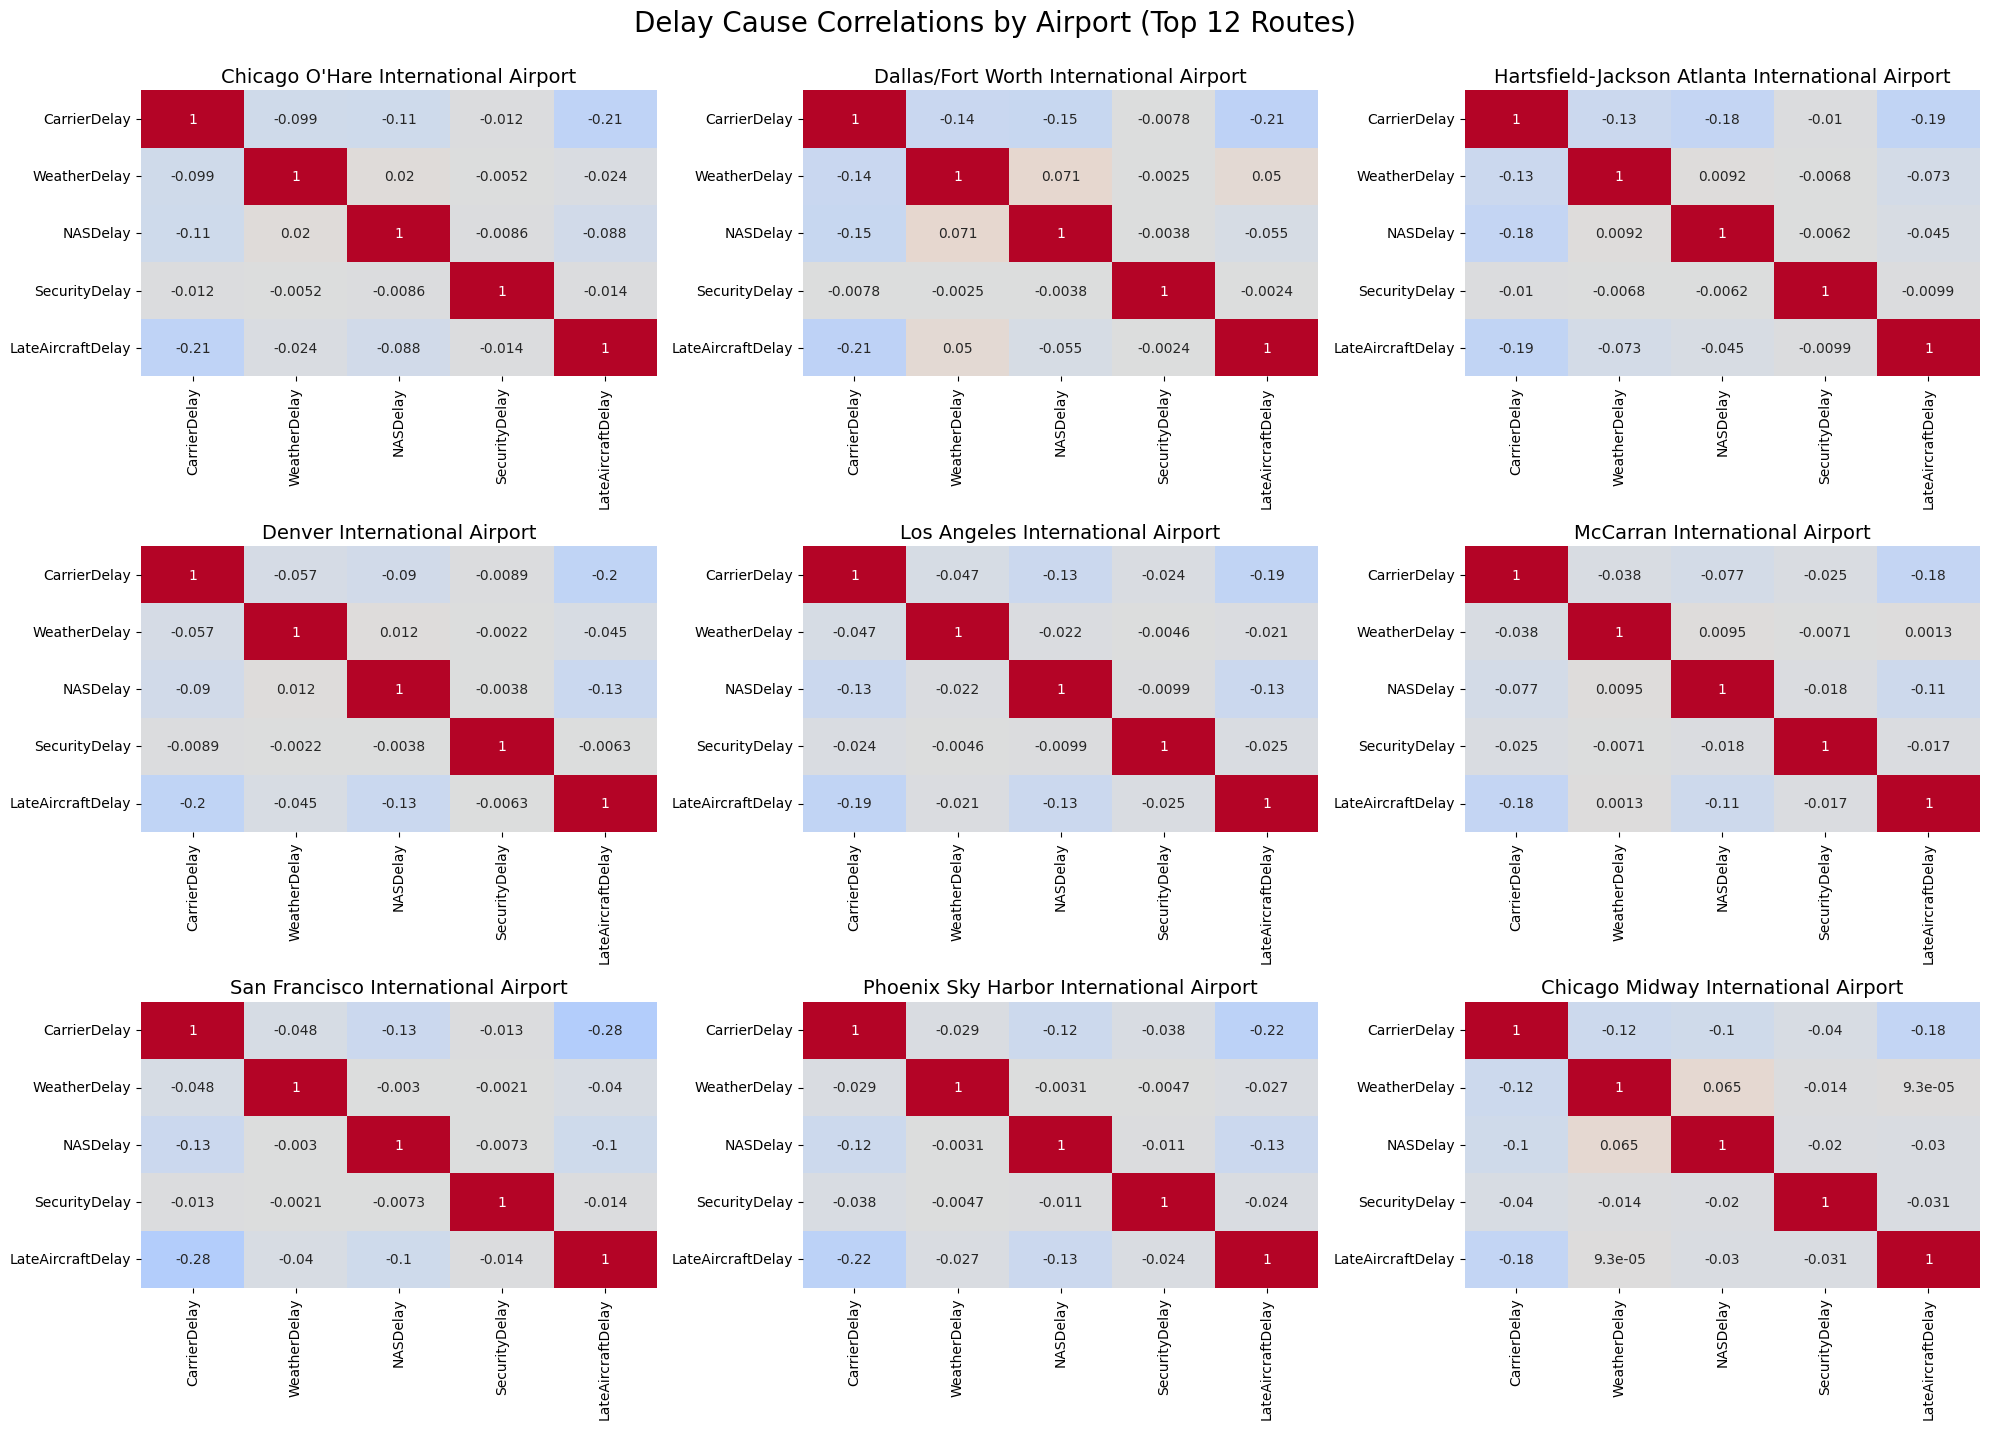

In [0]:
# delay co-relations in top 9 airports
delay_causes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
airports = df['Org_Airport'].value_counts()[:9] 
airports=airports.index
num_airports = len(airports)
rows, cols = 3 ,3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15)) 
axes = axes.flatten() 

for ax, r in zip(axes, airports):
    data = df[df['Org_Airport'] == r][delay_causes]
    sns.heatmap(data.corr(), annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    ax.set_title(f'{r}', fontsize=14)

for i in range(len(airports), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Delay Cause Correlations by Airport (Top 12 Routes)', fontsize=20, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [0]:
df['TotalDelay']=df['CarrierDelay']+df['WeatherDelay']+df['NASDelay']+df['SecurityDelay']+df['LateAircraftDelay']

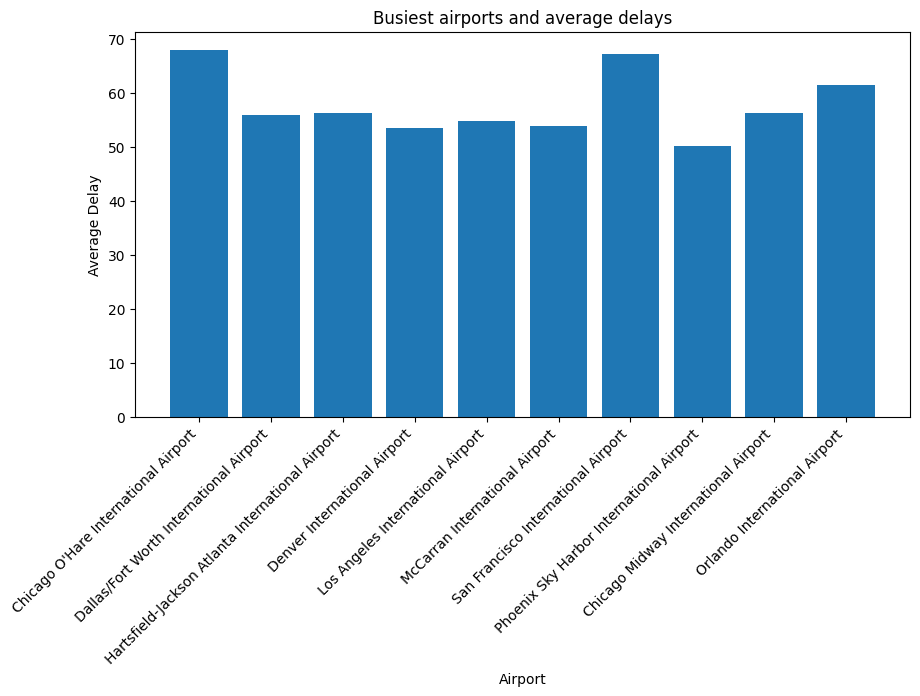

In [0]:
# Busiest airports and average delays
airports = df['Org_Airport'].value_counts()[:10]
airports=airports.index
data=[]
for a in airports:
    data.append(df[df['Org_Airport']==a]['TotalDelay'].mean())

plt.figure(figsize=(10,5))
plt.bar(airports,data)
plt.title('Busiest airports and average delays')
plt.xlabel('Airport')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Delay')
plt.show()

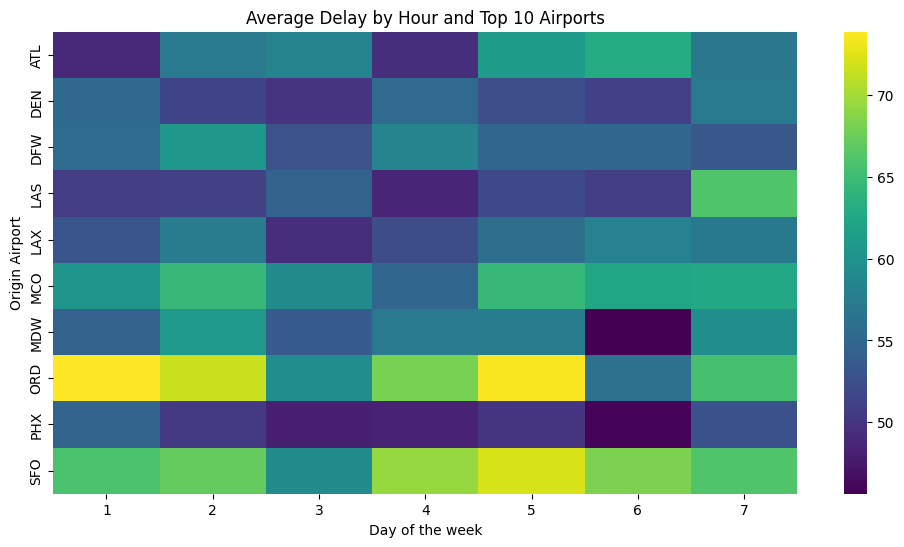

In [0]:
top10_airports = df['Origin'].value_counts().head(10).index
hour_delay = (
    df[df['Origin'].isin(top10_airports)]
    .groupby(['Origin','DayOfWeek'])['TotalDelay']
    .mean().unstack()
)
plt.figure(figsize=(12,6))
sns.heatmap(hour_delay, cmap="viridis")
plt.title("Average Delay by Hour and Top 10 Airports")
plt.xlabel("Day of the week")
plt.ylabel("Origin Airport")
plt.show()

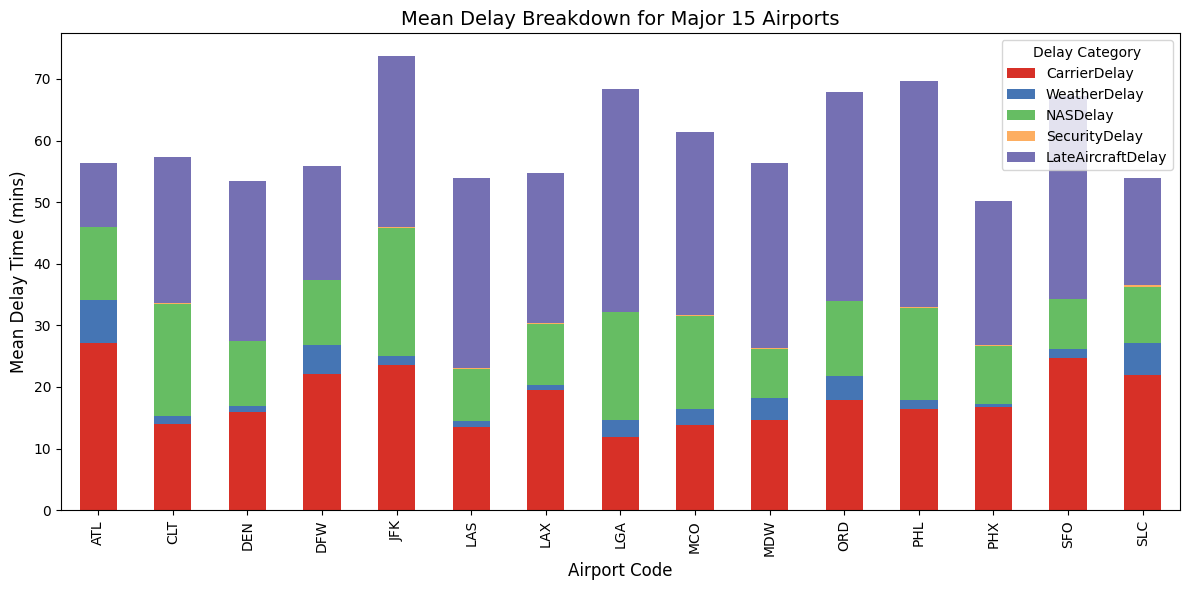

In [0]:
delay_causes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
major_airports = df['Origin'].value_counts().nlargest(15).index
avg_delays = (
    df[df['Origin'].isin(major_airports)]
    .groupby('Origin')[delay_causes]
    .mean()
    .reset_index()
)
palette = ['#d73027', '#4575b4', '#66bd63', '#fdae61', '#7570b3']
avg_delays.set_index('Origin').plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=palette
)

plt.title("Mean Delay Breakdown for Major 15 Airports", fontsize=14)
plt.xlabel("Airport Code", fontsize=12)
plt.ylabel("Mean Delay Time (mins)", fontsize=12)
plt.legend(title="Delay Category")
plt.tight_layout()
plt.show()


In [0]:
plt.rcdefaults()


In [0]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Day,Month,Year,Route,pairs,TotalDelay
0,4,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,01:30,01:17,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,3,1,2019,IND-BWI,IND-BWI,34
1,4,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,04:10,03:50,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,3,1,2019,IND-LAS,IND-LAS,57
2,4,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,02:15,01:47,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,3,1,2019,IND-MCO,IND-MCO,80
3,4,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,04:00,03:33,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,3,1,2019,IND-PHX,IND-PHX,15
4,4,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,02:15,01:50,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,3,1,2019,IND-TPA,IND-TPA,16


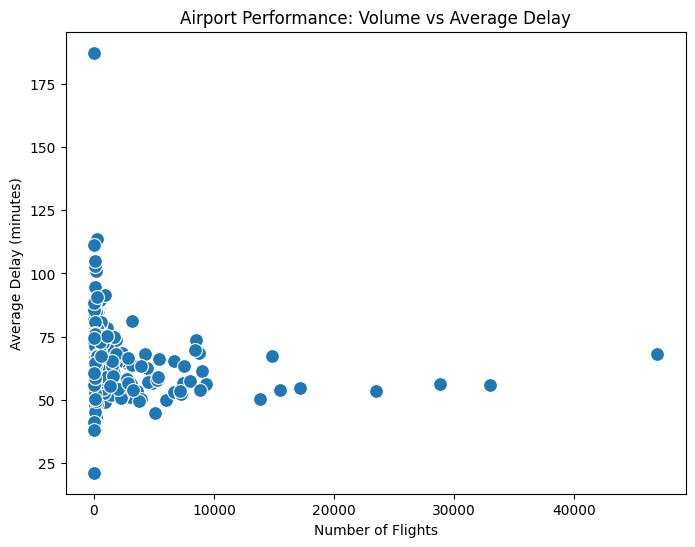

In [0]:
airport_perf = df.groupby('Origin').agg(
    Flights=('FlightNum', 'count'),
    AvgDelay=('TotalDelay', 'mean')
).reset_index()
plt.figure(figsize=(8,6))
sns.scatterplot(data=airport_perf, x='Flights', y='AvgDelay', s=100)
plt.title("Airport Performance: Volume vs Average Delay")
plt.xlabel("Number of Flights")
plt.ylabel("Average Delay (minutes)")
plt.show()

In [0]:
airport_coords = {
    'ATL': [33.6407, -84.4277],
    'LAX': [33.9416, -118.4085],
    'ORD': [41.9742, -87.9073],
    'DFW': [32.8998, -97.0403],
    'DEN': [39.8561, -104.6737],
    'JFK': [40.6413, -73.7781],
    'SFO': [37.6213, -122.3790],
    'SEA': [47.4502, -122.3088],
    'LAS': [36.0840, -115.1537],
    'MCO': [28.4312, -81.3081],
    'PHX': [33.4350, -112.0000],
    'IAH': [29.9902, -95.3368],
    'MIA': [25.7959, -80.2870],
    'BOS': [42.3656, -71.0096],
    'MSP': [44.8820, -93.2218],
    'DTW': [42.2124, -83.3534],
    'PHL': [39.8744, -75.2424],
    'BWI': [39.1754, -76.6684],
    'SLC': [40.7899, -111.9791],
    'SAN': [32.7338, -117.1933],
    'TPA': [27.9755, -82.5332],
    'HNL': [21.3245, -157.9251],
    'PDX': [45.5898, -122.5951],
    'STL': [38.7487, -90.3700],
    'AUS': [30.2020, -97.6664],
    'BNA': [36.1317, -86.6689],
    'CLT': [35.2140, -80.9431],
    'DCA': [38.8512, -77.0402],
    'MDW': [41.7850, -87.7524],
    'FLL': [26.0726, -80.1527],
    'OAK': [37.7126, -122.2197],
    'SJC': [37.3639, -121.9289],
    'RDU': [35.8776, -78.7875],
    'MCI': [39.2976, -94.7139],
    'MSY': [29.9934, -90.2580],
    'PIT': [40.4914, -80.2329],
    'CLE': [41.4117, -81.8498],
    'IND': [39.7173, -86.2944],
    'JAX': [30.4941, -81.6879],
    'SAT': [29.5337, -98.4698],
    'OMA': [41.3030, -95.8941],
    'OKC': [35.3931, -97.6007],
    'ABQ': [35.0496, -106.6170],
    'ELP': [31.8072, -106.3778],
    'ANC': [61.1743, -149.9983],
    'RNO': [39.4986, -119.7681],
    'ONT': [34.0560, -117.6012],
    'SDF': [38.1744, -85.7360],
    'CMH': [39.9979, -82.8919],
    'BUF': [42.9405, -78.7322],
    'BUR': [34.2007, -118.3587],
    'BHM': [33.5629, -86.7535],
    'CHS': [32.8987, -80.0405],
    'TUS': [32.1161, -110.9410],
    'PBI': [26.6832, -80.0956],
    'RIC': [37.5061, -77.3208],
    'SAV': [32.1276, -81.2021],
    'HOU': [29.6454, -95.2789],
    'BTV': [44.4720, -73.1503],
    'PWM': [43.6462, -70.3093],
    'MHT': [42.9326, -71.4357],
    'BIS': [46.7741, -100.7467],
    'TYS': [35.8110, -83.9940],
    'DAY': [39.9024, -84.2194],
    'FWA': [40.9785, -85.1951],
    'MSN': [43.1399, -89.3375],
    'GRR': [42.8808, -85.5228],
    'ALB': [42.7483, -73.8017],
    'BDL': [41.9389, -72.6832],
    'HPN': [41.0670, -73.7076],
    'MKE': [42.9472, -87.8966],
    'ICT': [37.6499, -97.4331],
    'FAT': [36.7762, -119.7181],
    'GEG': [47.6253, -117.5367],
    'EUG': [44.1233, -123.2186],
    'LBB': [33.6636, -101.8230],
    'LEX': [38.0365, -84.6059],
    'MEM': [35.0424, -89.9767],
    'BTR': [30.5328, -91.1496],
    'SHV': [32.4466, -93.8256],
    'MOB': [30.6914, -88.2428],
    'TLH': [30.3965, -84.3503],
    'DSM': [41.5340, -93.6631],
    'XNA': [36.2819, -94.3068],
    'GSP': [34.8956, -82.2189],
    'CAE': [33.9388, -81.1195],
    'AVL': [35.4362, -82.5418],
    'MYR': [33.6827, -78.9275],
    'SJU': [18.4394, -66.0018],
    'STT': [18.3373, -64.9734],
    'STX': [17.7019, -64.7986],
    'OGG': [20.8986, -156.4305],
    'KOA': [19.7388, -156.0456],
    'LIH': [21.9760, -159.3390],
    'ITO': [19.7203, -155.0480]
}
coords = df['Origin'].map(airport_coords)
df[['Latitude', 'Longitude']] = coords.apply(pd.Series)
df['Latitude'] = df['Latitude'].fillna(np.random.uniform(25, 49))
df['Longitude'] = df['Longitude'].fillna(np.random.uniform(-124, -67))

In [0]:
import plotly.express as px
airport_summary = (
    df.groupby('Origin')
      .agg(
          FlightCount=('FlightNum', 'count'),
          MeanDelay=('TotalDelay', 'mean')
      )
      .reset_index()
)

airport_summary['Lat'] = airport_summary['Origin'].map(lambda code: airport_coords.get(code, [None, None])[0])
airport_summary['Lon'] = airport_summary['Origin'].map(lambda code: airport_coords.get(code, [None, None])[1])

geo_fig = px.scatter_geo(
    airport_summary,
    lat='Lat',
    lon='Lon',
    size='FlightCount',
    color='MeanDelay',
    hover_name='Origin',
    projection='natural earth',
    title='Top US Airports – Traffic Volume & Delay Duration'
)

geo_fig.show()



# WEEK - 6

In [0]:
import numpy as np

df['Cancelled'] = np.random.randint(0, 2, size=len(df))

In [0]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Day,Month,Year,Route
0,4,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,01:30,01:17,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,1,N,0,2,0,0,0,32,3,1,2019,IND-BWI
1,4,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,04:10,03:50,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,1,N,0,10,0,0,0,47,3,1,2019,IND-LAS
2,4,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,02:15,01:47,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,3,1,2019,IND-MCO
3,4,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,04:00,03:33,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,1,N,0,3,0,0,0,12,3,1,2019,IND-PHX
4,4,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,02:15,01:50,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,3,1,2019,IND-TPA


In [0]:
## monthly cancellation
monthly_cancellations=df[df['Cancelled']==1].groupby('Month').size().sort_values(ascending=False)
monthly_cancellations = monthly_cancellations.sort_index()
monthly_cancellations

Month
1    43675
2    43472
3    47091
4    33982
5    34052
6    39714
dtype: int64

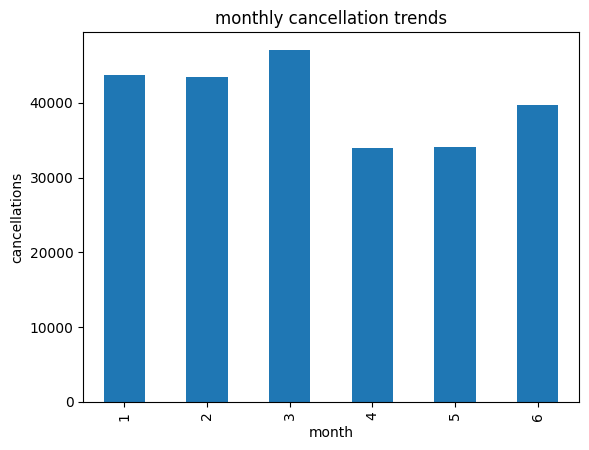

In [0]:
monthly_cancellations.plot(kind='bar',title='monthly cancellation trends',ylabel='cancellations',xlabel='month')
plt.show()

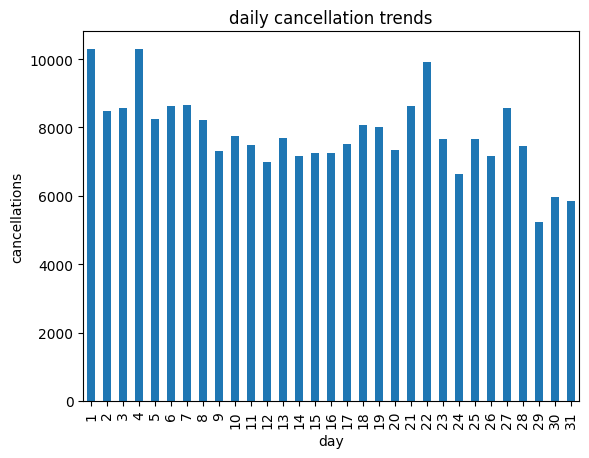

In [0]:
## daily cancellation
daily_cancellations=df[df['Cancelled']==1].groupby('Day').size().sort_values(ascending=False)
daily_cancellations = daily_cancellations.sort_index()
daily_cancellations.plot(kind='bar',title='daily cancellation trends',ylabel='cancellations',xlabel='day')
plt.show()

In [0]:
## delay causes for cancellation
cancellation_causes=df[df['Cancelled']==1][['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].sum()
cancellation_causes

CarrierDelay         4220088
WeatherDelay          765769
NASDelay             3285738
SecurityDelay          19877
LateAircraftDelay    6459297
dtype: int64

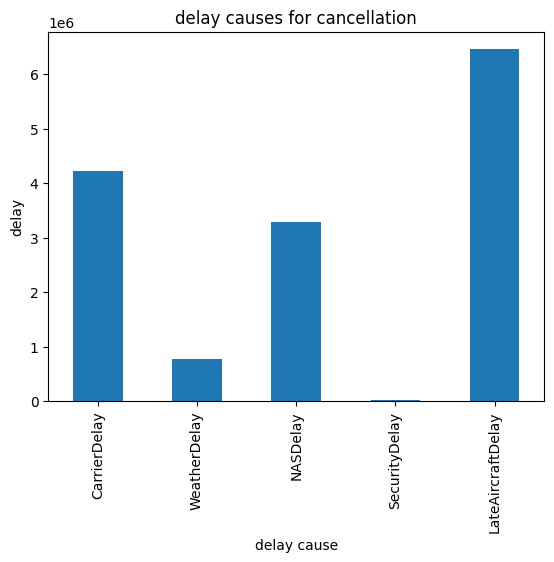

In [0]:
cancellation_causes.plot(kind='bar',title='delay causes for cancellation',ylabel='delay',xlabel='delay cause')
plt.show()

In [0]:
## holiday cancellation analysis
winter=[1,2,11,12]
cancel=df.groupby('Month')['Cancelled'].mean().reset_index()
cancel['season']=cancel['Month'].apply(lambda x:'winter' if x in winter else 'non-winter')
cancel

,Month,Cancelled,season
0,1,0.496815,winter
1,2,0.499868,winter
2,3,0.499926,non-winter
3,4,0.498496,non-winter
4,5,0.500242,non-winter
5,6,0.501212,non-winter


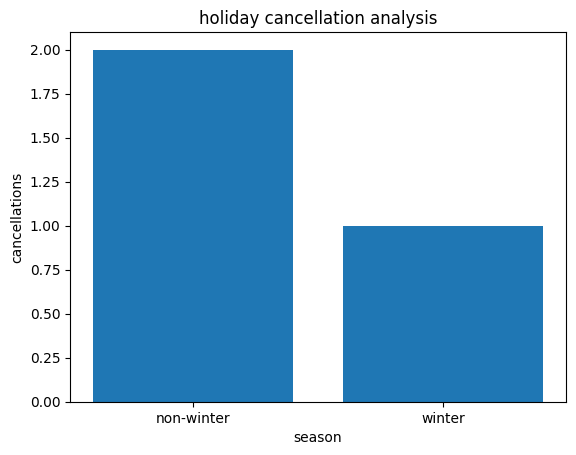

In [0]:
summary=cancel.groupby('season')['Cancelled'].sum().reset_index()
plt.bar(summary['season'],summary['Cancelled'])
plt.title('holiday cancellation analysis')
plt.xlabel('season')
plt.ylabel('cancellations')
plt.show()

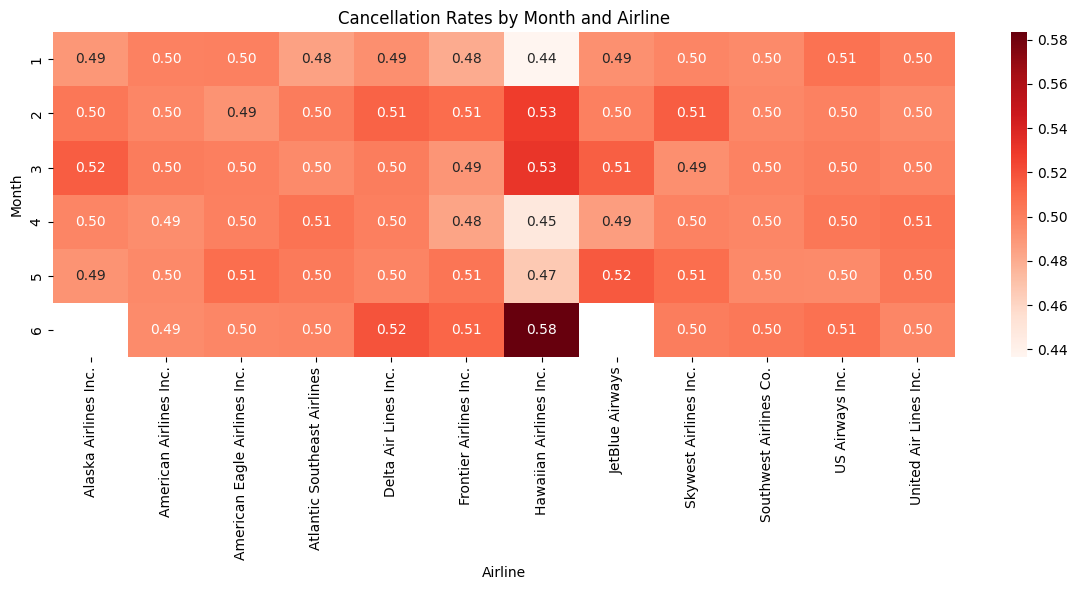

In [0]:
## heat map of the cancellation rates by month and airlines
cancellation_rate = (
    df.groupby(['Month', 'Airline'])['Cancelled']
    .mean()
    .unstack()
)
plt.figure(figsize=(12, 6))
sns.heatmap(cancellation_rate, annot=True, fmt=".2f", cmap="Reds")
plt.title("Cancellation Rates by Month and Airline")
plt.xlabel("Airline")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

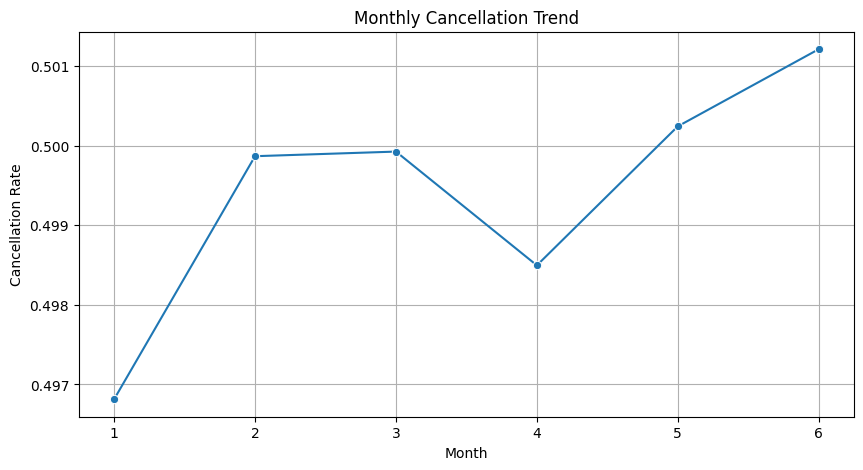

In [0]:
# Monthly cancellation rate
cancellation_trends = df.groupby(['Month'])['Cancelled'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=cancellation_trends, x='Month', y='Cancelled',  marker='o', palette='Set2')
plt.title('Monthly Cancellation Trend')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.show()